# Plot Grouping CV Test Results
Make an ROC curve from the grouping cross-validation results

In [10]:
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn import metrics
import pandas as pd
import json

## Load in the Data
It is in a JSON file, turn that into a DataFrame

In [11]:
def read_cv_data(filename):
    """Read the CV results for a certain test

    :param d: Name of test directory"""

    json_data = json.load(open(filename))

    # Get a few different stats
    composition = [e['composition'] for e in json_data['entries']]
    gfa_meas = [e['properties'][0]['measured'] for e in json_data['entries']]
    gfa_pred = [e['properties'][0]['predicted'] for e in json_data['entries']]
    gfa_am_prob = [e['properties'][0]['probabilities'][0] for e in json_data['entries']]

    # Return as a data frame
    return pd.DataFrame(list(zip(composition,gfa_meas,gfa_pred,gfa_am_prob)),
        columns=['composition','gfa_measured','gfa_predicted','gfa_prob_am'])

In [12]:
cv_data = read_cv_data('cv-data-grouping.json')

## Make an ROC Plot

In [13]:
fpr, tpr, thr = metrics.roc_curve(cv_data['gfa_measured'], cv_data['gfa_prob_am'], pos_label=0)

In [14]:
print metrics.roc_auc_score(cv_data['gfa_measured'], 1.0 - cv_data['gfa_prob_am'])

0.882577257655


Save data to csv format

In [15]:
pd.DataFrame({'fpr':fpr.tolist(), 'tpr':tpr.tolist()}).to_csv('cv-roc-grouping.csv', index=False)

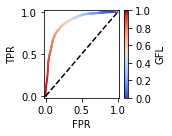

In [33]:
fig, ax = plt.subplots()

plot_data = ax.scatter(fpr, tpr, c=thr, cmap='coolwarm', vmin=0, vmax=1, s=1)

ax.plot([0,1],[0,1], 'k--')

ax.set_xticks([0,0.5,1])
ax.set_xlim(-0.02, 1.02)
ax.set_ylim(ax.get_xlim())

ax.set_xlabel('FPR')
ax.set_ylabel('TPR')

fig.colorbar(plot_data, label='GFL')

fig.set_size_inches(2.5, 2)
fig.tight_layout()
fig.savefig('cv-roc-grouping.png', dpi=320)